 https://www.kaggle.com/competitions/playground-series-s4e5
## Назначение файлов:<br>
* train.csv — обучающий набор данных с множеством факторов (признаков) и целевой переменной FloodProbability (вероятность затопления).    Используется для построения и обучения модели. Каждая строка — наблюдение с разными факторами.

* test.csv — тестовый набор с теми же факторами, но без значения FloodProbability. По этим данным нужно сделать прогнозы с помощью обученной модели.

* sample_submission.csv — пример формата для отправки результатов (submission), содержит id строк из test.csv и колонки FloodProbability, которые нужно заполнить прогнозами из модели

## Описание столбцов train и test
 Каждый столбец-фактор, влияющий на вероятность затопления:

* id-уникальный идентификатор записи
* MonsoonIntensity-интенсивность муссонных дождей
* TopographyDrainage-особенности рельефа и водоотведения
* RiverManagement-управление реками
* Deforestation-вырубка лесов
* Urbanization-уровень урбанизации
* ClimateChange-влияние изменения климата
* DamsQuality-качество плотин
* Siltation-зарастание осадками
* AgriculturalPractices-сельскохозяйственные практики
* Encroachments-захват территорий
* IneffectiveDisasterPreparedness-неэффективность подготовки к ЧС
* DrainageSystems-состояние дренажных систем
* CoastalVulnerability-уязвимость прибрежных зон
* Landslides-оползни
* Watersheds-состояние водосборных бассейнов
* DeterioratingInfrastructure-ухудшение инфраструктуры
* PopulationScore-показатели населения (плотность, рост)
* WetlandLoss-потеря водно-болотных угодий
* InadequatePlanning-недостаточное планирование территорий
* PoliticalFactors-политические факторы
* FloodProbability-целевая переменная (только в train.csv), вероятность затопления

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [10]:
df = pd.read_csv("train.csv")
df.head(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [11]:
df.shape

(1117957, 22)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [13]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [14]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isna().sum()
# пропусков нет!

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

<Axes: >

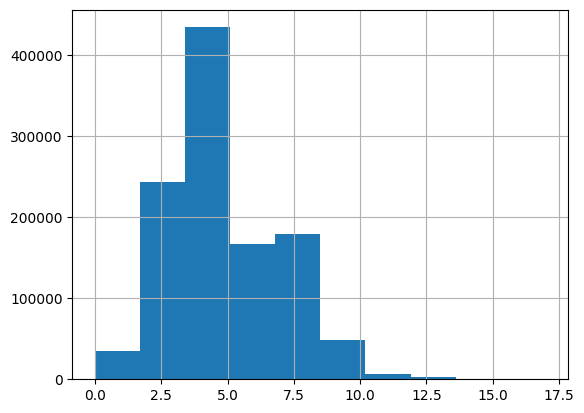

In [30]:
df.DrainageSystems.hist()

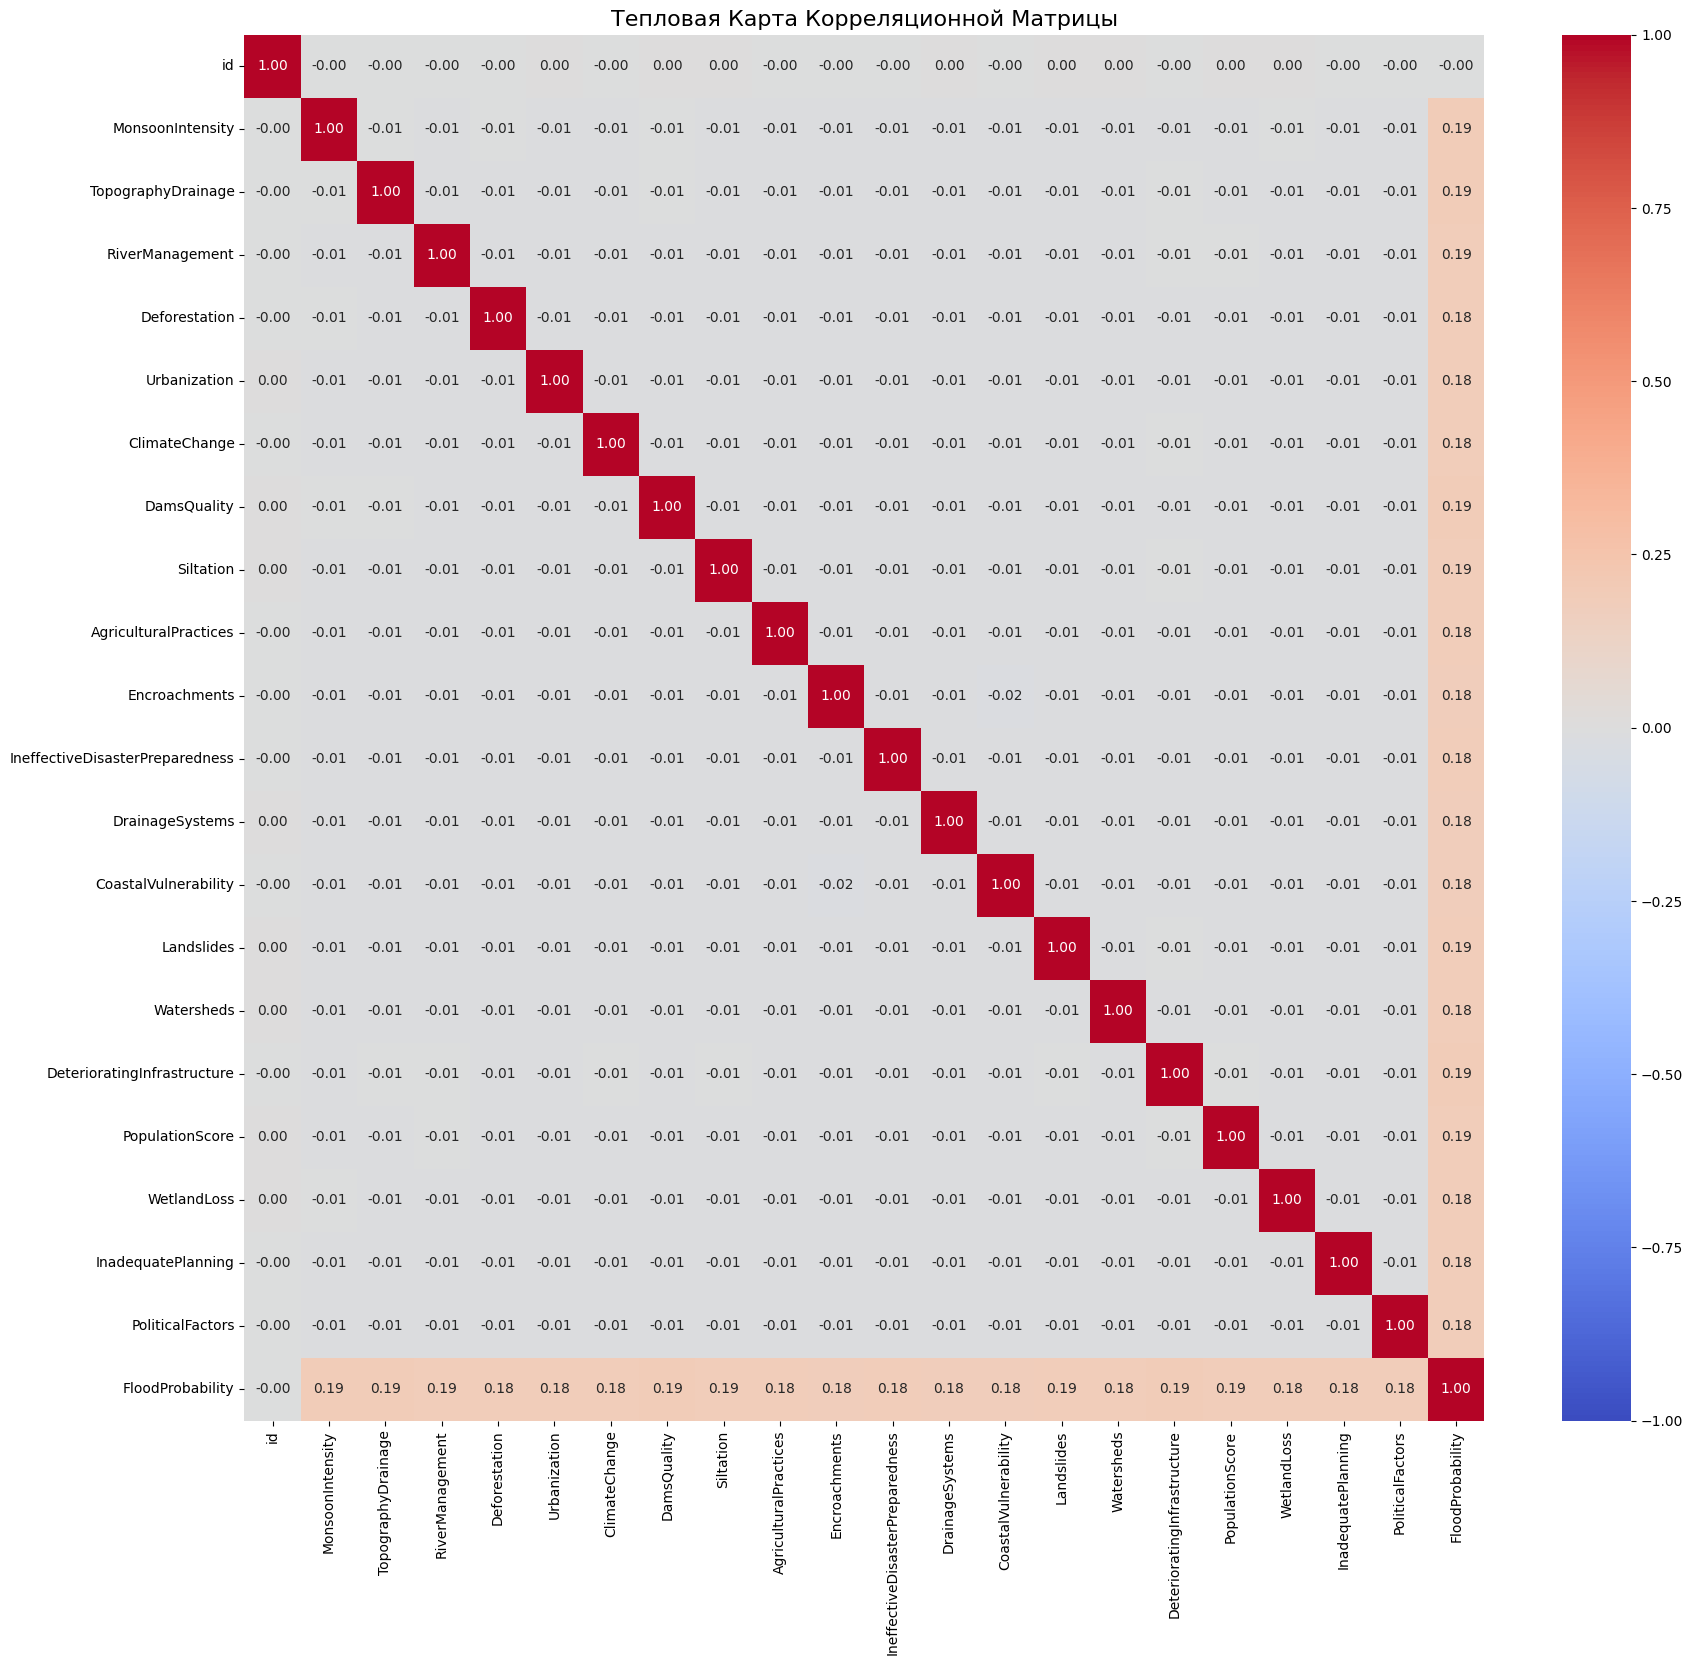

In [36]:
num_cols = df.select_dtypes(include='number').columns

corr_matrix = df[num_cols].corr()
plt.figure(figsize=(20, 18)) # Задаем размер графика для лучшей читаемости

sns.heatmap(
    corr_matrix,
    annot=True,     # Показывать числовые значения корреляции на карте
    fmt=".2f",      # Формат чисел (2 знака после запятой)
    cmap='coolwarm',# Выбор цветовой палитры (coolwarm хорошо показывает как
    #положительную, так и отрицательную корреляцию)
    vmin=-1,        # Минимальное значение для цветовой шкалы
    vmax=1          # Максимальное значение для цветовой шкалы
)

plt.title('Тепловая Карта Корреляционной Матрицы', fontsize=16)
# Добавляем заголовок
plt.show()

## Разделение данных на признаки и целевую переменную

In [39]:
# признаки
x=df.drop('FloodProbability',axis=1)
# целевая переменная
y=df.FloodProbability
x.shape,y.shape

((1117957, 21), (1117957,))

In [40]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 5.8 MB/s eta 0:00:02
   -------------- ------------------------- 3.1/8.7 MB 9.0 MB/s eta 0:00:01
   ------------------------- -------------- 5.5/8.7 MB 10.1 MB/s eta 0:00:01
   ------------------------------------ --- 7.9/8.7 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 9.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   -- ------------------------------------- 2.4/38.5 MB 11.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/38.5 MB 11.8 MB/s eta 0:00:03
   ------- -------------------------------- 7.1/38.5 MB 11.8 MB/s eta 0:00:03
   ---------- ----------------------------- 9.7/38.5 MB 11.8 MB/s eta 0:00:03
   ---------- ----------------------------- 10.5/38.5 MB 11.8 MB/s eta 0:00:03
   -------------- ------------------------- 13.6/38.5 MB 11.3 MB/s eta 0:00:03
   ------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


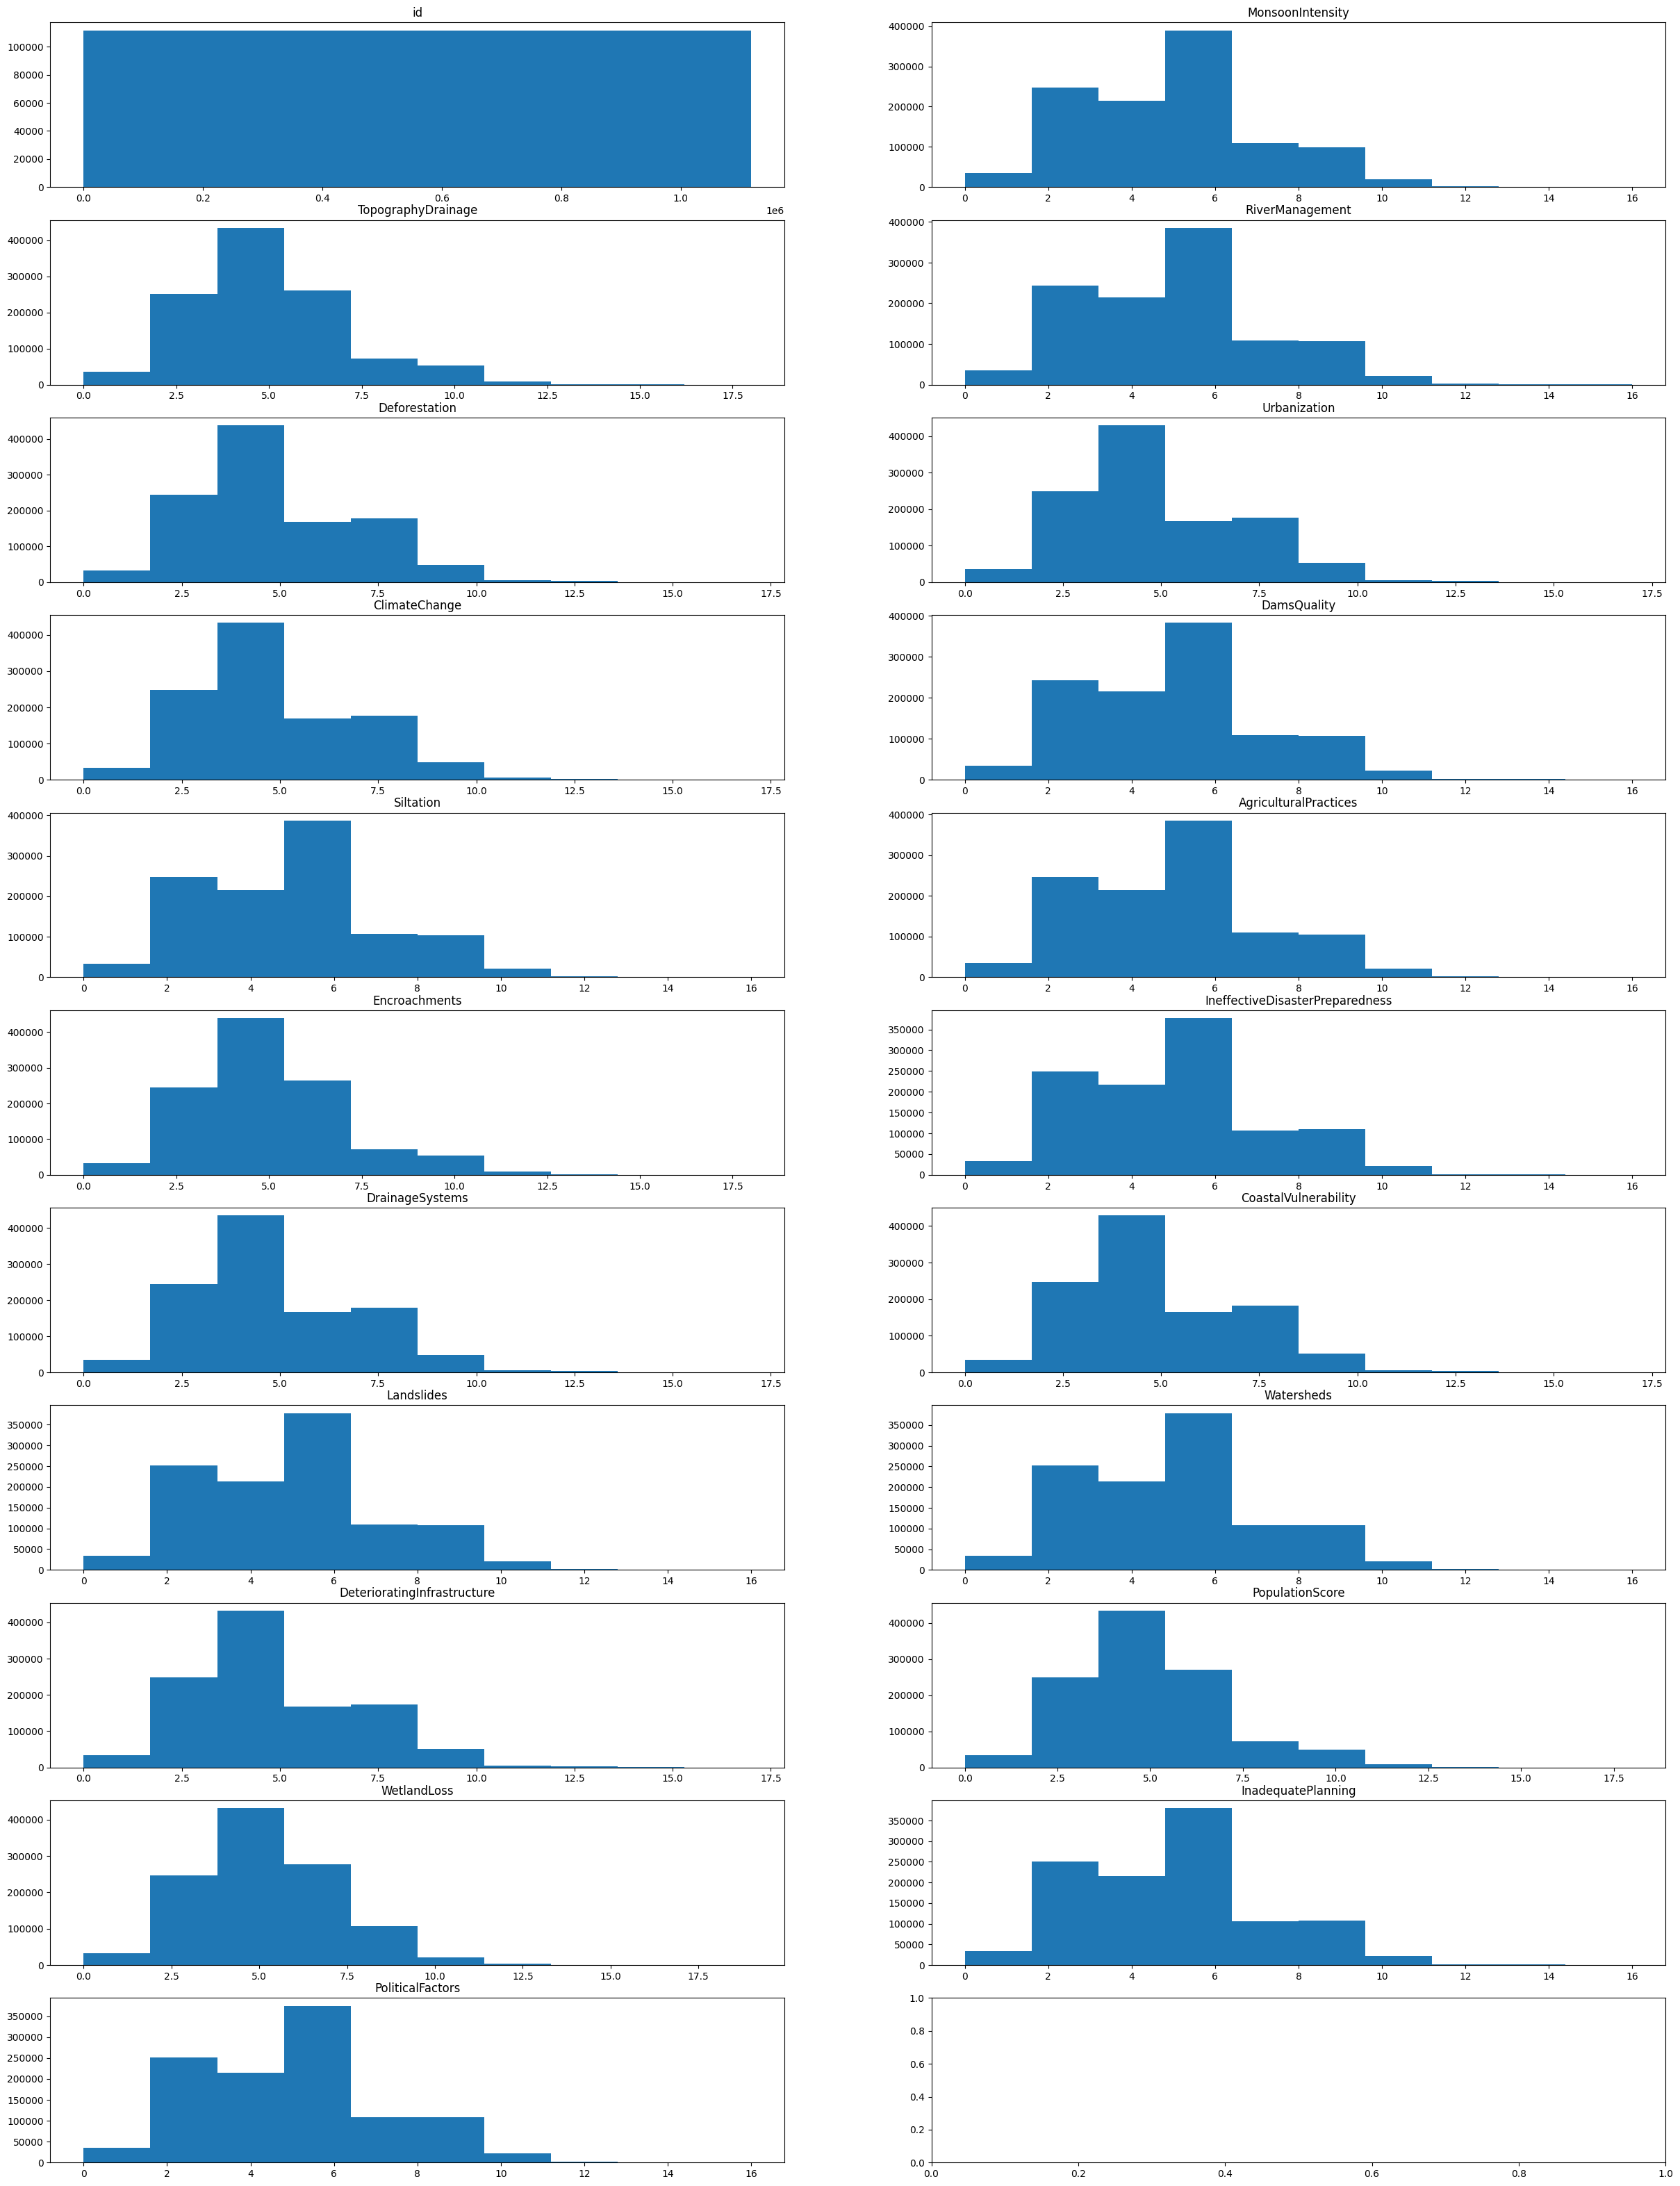

In [47]:
num_df_cols = df.select_dtypes("int64").columns
num_columns = df[num_df_cols].columns
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(30,40))

for idx, column_name in enumerate(num_columns):
    plt.subplot(height,width, idx+1)
    plt.hist(x=df[column_name])
    plt.title(column_name)